In [98]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [99]:
train = pd.read_csv('train.csv')
train.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
0,3311712,12,01-09-1990,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,1406
1,3311812,12,02-09-1990,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,1409
2,3311912,12,03-09-1990,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,1386
3,3312012,12,04-09-1990,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,1365
4,3312112,12,05-09-1990,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,1413


In [100]:
test = pd.read_csv('test.csv')
test.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type
0,3725712,12,01-01-2002,233.0,55.48,76.0,38.0,0.0249,8259.0,8300.0,8211.0,260.0,316.0,243.0,285.0,210.0,3
1,3725812,12,02-01-2002,211.0,108.68,152.0,60.8,154.3800,8208.0,8294.0,8136.0,120.0,280.0,252.0,291.0,201.0,3
2,3725912,12,03-01-2002,237.0,95.76,121.6,83.6,34.8600,8252.0,8304.0,8146.0,236.0,292.0,234.0,270.0,207.0,3
3,3726012,12,04-01-2002,286.0,101.08,129.2,83.6,34.0300,8146.0,8249.0,8092.0,204.0,284.0,228.0,264.0,201.0,3
4,3726112,12,05-01-2002,281.0,63.08,83.6,45.6,4.9800,8341.0,8376.0,8259.0,144.0,316.0,237.0,279.0,213.0,3


In [101]:
train.isnull().any()

ID                              False
Park_ID                         False
Date                            False
Direction_Of_Wind                True
Average_Breeze_Speed             True
Max_Breeze_Speed                 True
Min_Breeze_Speed                 True
Var1                             True
Average_Atmospheric_Pressure     True
Max_Atmospheric_Pressure         True
Min_Atmospheric_Pressure         True
Min_Ambient_Pollution            True
Max_Ambient_Pollution            True
Average_Moisture_In_Park         True
Max_Moisture_In_Park             True
Min_Moisture_In_Park             True
Location_Type                   False
Footfall                        False
dtype: bool

(array([    64.,    822.,   5573.,  13773.,  22784.,  23085.,  26533.,
         17824.,   3653.,    428.]),
 array([  310. ,   471.5,   633. ,   794.5,   956. ,  1117.5,  1279. ,
         1440.5,  1602. ,  1763.5,  1925. ]),
 <a list of 10 Patch objects>)

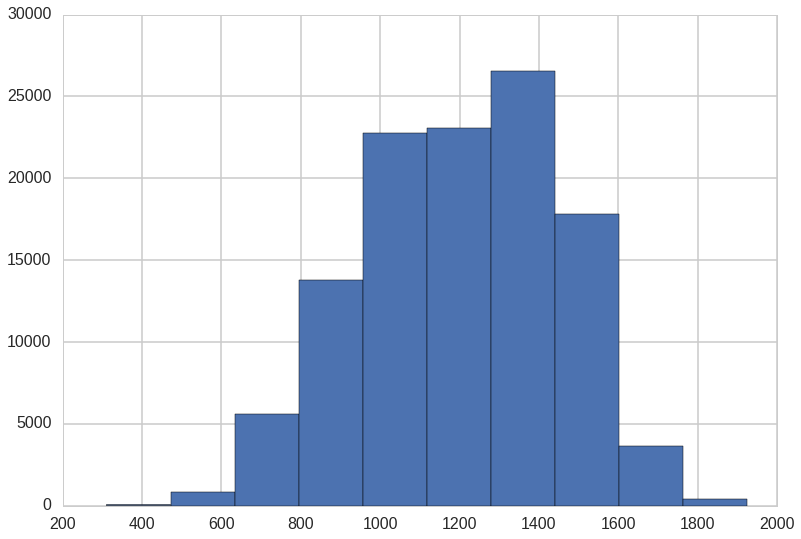

In [102]:
plt.hist(train['Footfall'])

In [103]:
train['Date'] = pd.to_datetime(train['Date'], format='%d-%m-%Y')
test['Date'] = pd.to_datetime(test['Date'], format='%d-%m-%Y')

In [104]:
train.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
0,3311712,12,1990-09-01,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,1406
1,3311812,12,1990-09-02,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,1409
2,3311912,12,1990-09-03,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,1386
3,3312012,12,1990-09-04,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,1365
4,3312112,12,1990-09-05,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,1413


In [105]:
train['day'] = train['Date'].dt.day
test['day'] = test['Date'].dt.day

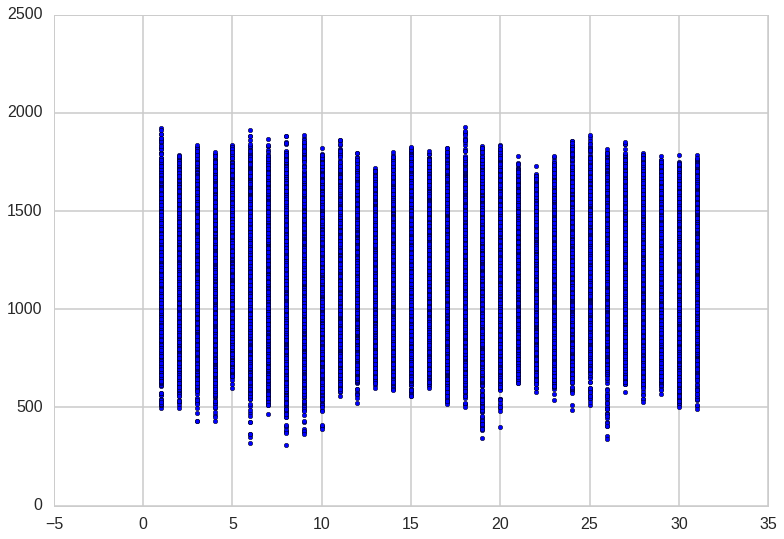

In [106]:
plt.scatter(train['day'], train['Footfall'])

(array([ 11289.,  11289.,  11289.,  11289.,  11289.,  11289.,  11286.,
         11286.,  11286.,  12947.]),
 array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.]),
 <a list of 10 Patch objects>)

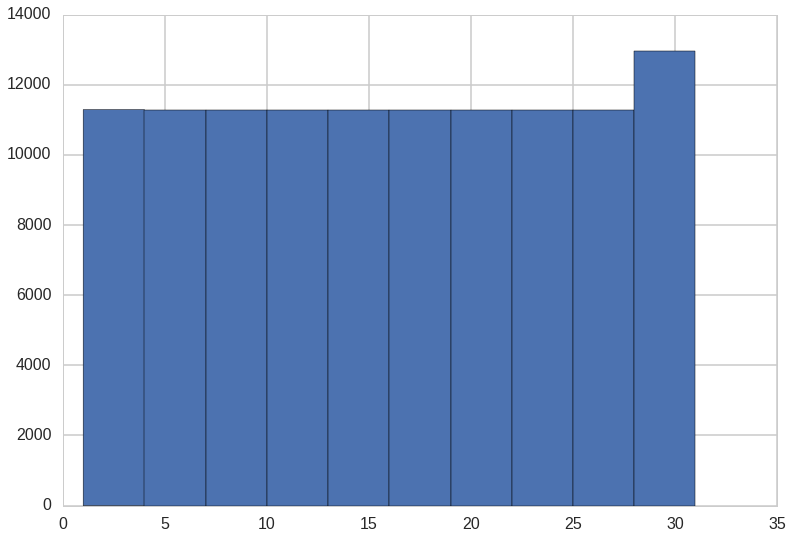

In [107]:
plt.hist(train['day'])

In [108]:
train['weekday'] = train['Date'].dt.dayofweek

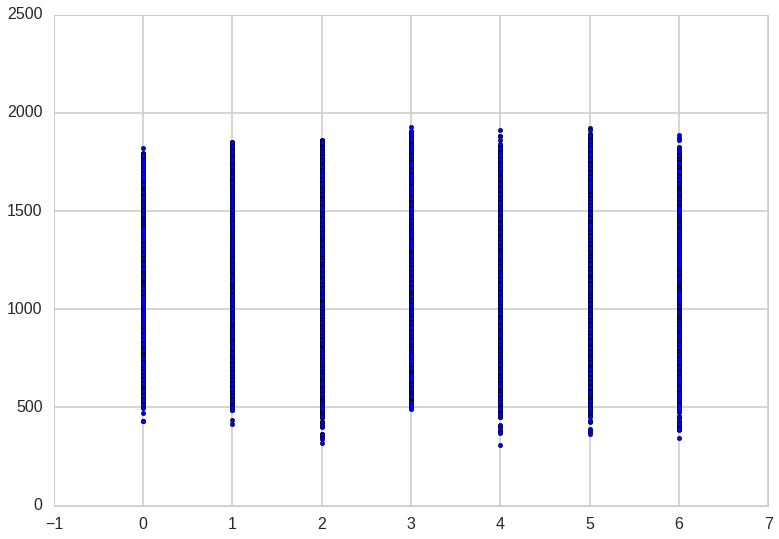

In [109]:
plt.scatter(train['weekday'], train['Footfall'])

In [110]:
test['weekday'] = test['Date'].dt.dayofweek

In [111]:
train.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall,day,weekday
0,3311712,12,1990-09-01,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,1406,1,5
1,3311812,12,1990-09-02,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,1409,2,6
2,3311912,12,1990-09-03,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,1386,3,0
3,3312012,12,1990-09-04,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,1365,4,1
4,3312112,12,1990-09-05,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,1413,5,2


In [112]:
del train['day']
del test['day']

In [113]:
train.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall,weekday
0,3311712,12,1990-09-01,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,1406,5
1,3311812,12,1990-09-02,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,1409,6
2,3311912,12,1990-09-03,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,1386,0
3,3312012,12,1990-09-04,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,1365,1
4,3312112,12,1990-09-05,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,1413,2


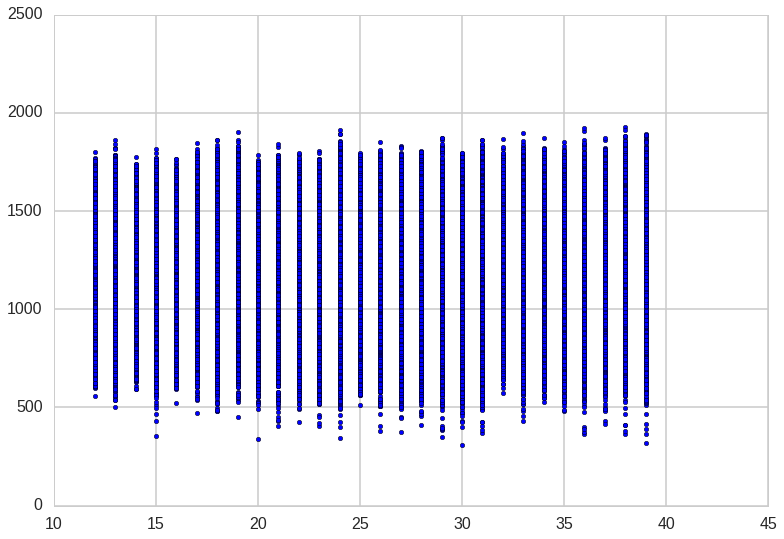

In [114]:
plt.scatter(train['Park_ID'], train['Footfall'])

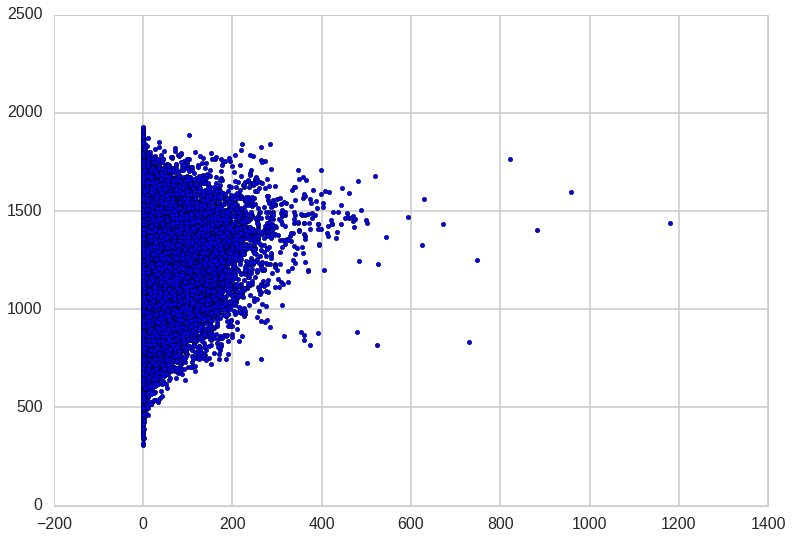

In [115]:
plt.scatter(train['Var1'], train['Footfall'])

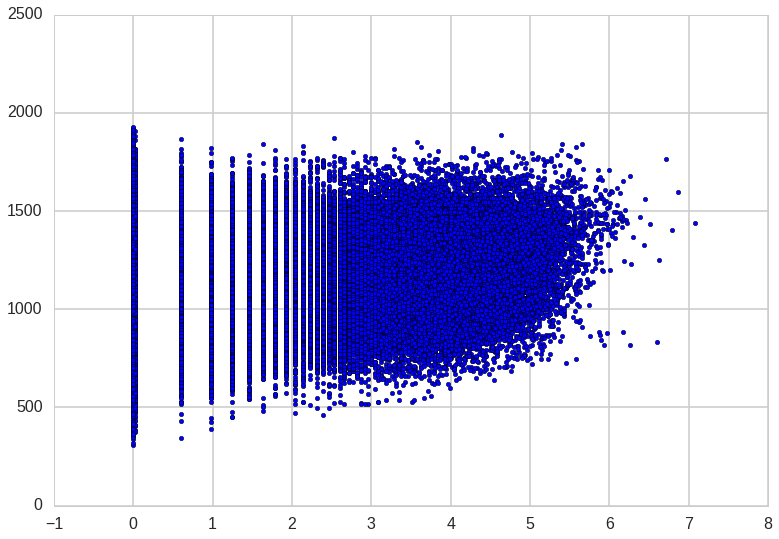

In [116]:
plt.scatter(np.log(1+train['Var1']), train['Footfall'])

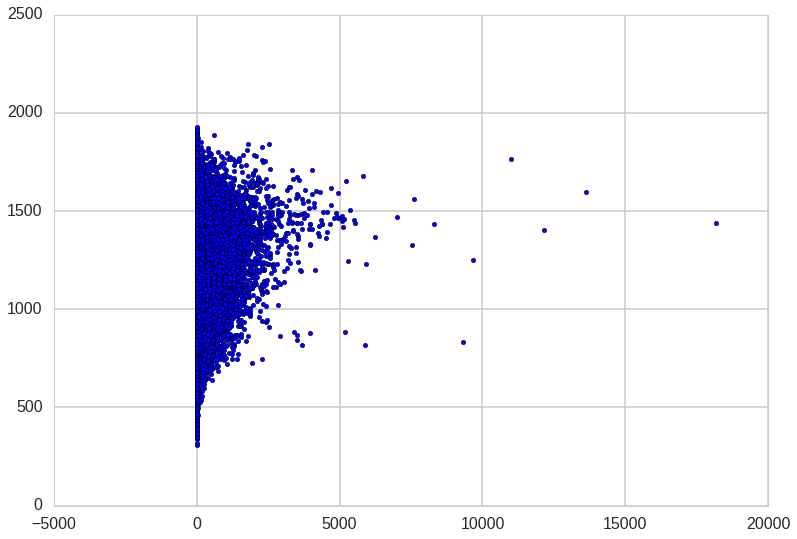

In [120]:
plt.scatter(np.power(4, np.log(1+train['Var1'])), train['Footfall'])

In [121]:
train['Var1'] = np.log(1+train['Var1'])
test['Var1'] = np.log(1+test['Var1'])

In [122]:
train.corr()

,ID,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall,weekday
ID,1.000000,0.006604,0.000188,-0.019711,-0.022828,-0.019252,-0.032827,0.013205,0.002701,0.022042,0.030235,-0.011796,-0.046205,0.003539,-0.048289,-0.020017,0.005945,-0.000012
Park_ID,0.006604,1.000000,-0.011702,-0.254700,-0.244308,-0.206895,-0.016234,0.024007,0.023070,0.026726,-0.030881,0.041081,-0.039819,0.098473,-0.110576,0.032950,0.004938,0.000008
Direction_Of_Wind,0.000188,-0.011702,1.000000,0.130190,0.174913,0.053646,0.255650,-0.113537,-0.096337,-0.133386,0.044231,0.122890,0.131413,0.108886,0.110538,-0.001736,0.097791,0.005319
Average_Breeze_Speed,-0.019711,-0.254700,0.130190,1.000000,0.939240,0.879702,0.346312,-0.338415,-0.284753,-0.372108,0.287912,0.029159,-0.004368,-0.294786,0.171017,-0.063469,-0.074574,0.007951
Max_Breeze_Speed,-0.022828,-0.244308,0.174913,0.939240,1.000000,0.739617,0.387719,-0.360265,-0.298931,-0.403972,0.261887,0.089219,-0.015761,-0.242604,0.122521,-0.068548,-0.037826,0.009027
Min_Breeze_Speed,-0.019252,-0.206895,0.053646,0.879702,0.739617,1.000000,0.248062,-0.262979,-0.228288,-0.280722,0.259042,-0.053827,0.030279,-0.302916,0.207190,-0.042174,-0.109744,0.002754
Var1,-0.032827,-0.016234,0.255650,0.346312,0.387719,0.248062,1.000000,-0.508713,-0.453227,-0.529998,-0.072538,-0.000148,0.335668,0.191529,0.308681,-0.004443,0.005682,0.003157
Average_Atmospheric_Pressure,0.013205,0.024007,-0.113537,-0.338415,-0.360265,-0.262979,-0.508713,1.000000,0.974096,0.975541,-0.038343,-0.046624,-0.153256,-0.050730,-0.172049,0.004875,-0.054022,-0.002960
Max_Atmospheric_Pressure,0.002701,0.023070,-0.096337,-0.284753,-0.298931,-0.228288,-0.453227,0.974096,1.000000,0.913437,-0.044225,-0.054715,-0.122840,-0.038282,-0.138939,0.005146,-0.107707,-0.005073
Min_Atmospheric_Pressure,0.022042,0.026726,-0.133386,-0.372108,-0.403972,-0.280722,-0.529998,0.975541,0.913437,1.000000,-0.041464,-0.047115,-0.168049,-0.057040,-0.189426,0.005378,-0.004614,-0.001731
